In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
batch_size = 32
img_height = 100
img_width = 100

In [5]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
print(train)

                             image     label
0       images/train\angry\157.jpg     angry
1        images/train\angry\23.jpg     angry
2       images/train\angry\245.jpg     angry
3       images/train\angry\249.jpg     angry
4       images/train\angry\251.jpg     angry
..                             ...       ...
163  images/train\surprise\788.jpg  surprise
164  images/train\surprise\843.jpg  surprise
165  images/train\surprise\867.jpg  surprise
166  images/train\surprise\947.jpg  surprise
167  images/train\surprise\993.jpg  surprise

[168 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(test)
print(test['image'])

                           image     label
0        images/test\angry\0.jpg     angry
1        images/test\angry\1.jpg     angry
2       images/test\angry\10.jpg     angry
3      images/test\angry\107.jpg     angry
4      images/test\angry\117.jpg     angry
..                           ...       ...
163  images/test\surprise\55.jpg  surprise
164  images/test\surprise\61.jpg  surprise
165  images/test\surprise\69.jpg  surprise
166  images/test\surprise\81.jpg  surprise
167  images/test\surprise\88.jpg  surprise

[168 rows x 2 columns]
0          images/test\angry\0.jpg
1          images/test\angry\1.jpg
2         images/test\angry\10.jpg
3        images/test\angry\107.jpg
4        images/test\angry\117.jpg
                  ...             
163    images/test\surprise\55.jpg
164    images/test\surprise\61.jpg
165    images/test\surprise\69.jpg
166    images/test\surprise\81.jpg
167    images/test\surprise\88.jpg
Name: image, Length: 168, dtype: object


In [9]:
from tqdm.notebook import tqdm

In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [11]:
train_features = extract_features(train['image']) 

  0%|          | 0/168 [00:00<?, ?it/s]

C:\Users\sinha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [12]:
test_features = extract_features(test['image'])

  0%|          | 0/168 [00:00<?, ?it/s]

In [13]:
x_train = train_features/255.0
x_test = test_features/255.0

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [16]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [17]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [18]:
# model = Sequential()
# # convolutional layers
# model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))

# model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))

# model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))

# model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))

# model.add(Flatten())
# # fully connected layers
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.3))
# # output layer
# model.add(Dense(7, activation='softmax'))

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Initialize the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(928, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(556, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(564, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(712, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

# Add fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(7, activation='softmax'))



# # Print model summary
# model.summary()


C:\Users\sinha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 10, validation_data = (x_test,y_test)) 

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 178s 63s/step - accuracy: 0.1105 - loss: 2.0483 - val_accuracy: 0.1429 - val_loss: 1.9483
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 160s 61s/step - accuracy: 0.1566 - loss: 1.9771 - val_accuracy: 0.1429 - val_loss: 1.9373
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 156s 65s/step - accuracy: 0.1342 - loss: 1.9612 - val_accuracy: 0.1429 - val_loss: 1.9421
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 152s 61s/step - accuracy: 0.0987 - loss: 1.9559 - val_accuracy: 0.1429 - val_loss: 1.9436
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 208s 65s/step - accuracy: 0.1473 - loss: 1.9463 - val_accuracy: 0.1429 - val_loss: 1.9441
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 160s 58s/step - accuracy: 0.1159 - loss: 1.9464 - val_accuracy: 0.1429 - val_loss: 1.9446
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 169s 64s/step - accuracy: 0.1672 - loss: 1.9418 - val_accuracy: 0.1429 - val_loss: 1.9442
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 163s 65s/step - accuracy: 0.1487 - loss: 1.9460 - val_accuracy: 0.1131 - val_loss:

In [27]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.keras")

In [28]:

from keras.models import model_from_json

In [32]:
# Save the model architecture to JSON
model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)

# Save the model weights to HDF5
model.save_weights("emotiondetector.weights.h5")

print("Saved model architecture and weights to disk")


Saved model architecture and weights to disk


In [33]:
from keras.models import model_from_json
from keras.optimizers import Adam

# Load the model architecture from JSON
with open("emotiondetector.json", 'r') as json_file:
    model_json = json_file.read()

# Recreate the model from JSON
model = model_from_json(model_json)

# Load the model weights from HDF5
model.load_weights("emotiondetector.weights.h5")

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

print("Loaded model and compiled with new optimizer")


Loaded model and compiled with new optimizer


In [34]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.keras")

In [35]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [36]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [39]:
image = 'images/train/sad/761.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
model prediction is  fear


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad


C:\Users\sinha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
model prediction is  fear


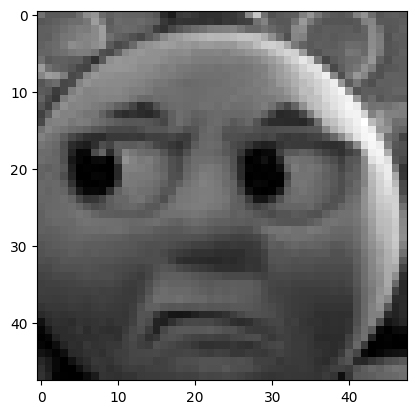

In [41]:
image = 'images/train/sad/761.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')